<a href="https://colab.research.google.com/github/dishantgupta2004/Deep-Learning-Assignments/blob/main/Forward_and_Backward_PropogationAssignment_DishantGupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Explain the concept of forward propagation in a neural network.**

Forward propagation is the process of moving input data through the layers of a neural network to generate an output (also called a prediction). This happens during both training and inference.
It involves:
1. Taking the input features.
2. Passing them through each layer (with weights and biases).
3. Applying activation functions at each layer.
4. Producing the final output.

**Maths behind Forward Propogation**
- for rach layer l, forward pass involves two main steps:
 1. Linear transformation
 2. Activation function



### **What is the purpose of the activation function in forward propagation?**


1. Without activation functions, the network is just a linear function, nmatter how many layers you add.
2. Activation functions introduce non-linearity, allowing neural networks to learn complex patterns.

🔹 **Purpose of Activation Function**: Activation functions introduce **non-linearity** into the neural network. Without them, no matter how many layers you have, the entire network behaves like a single linear transformation.

- **Common Activation Functions**
 1. $\text{ReLU}(z) = \max(0, z)$
 2. $\sigma(z) = \frac{1}{1 + e^{-z}}$
 3. $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

Activation functions allow the model to approximate **non-linear decision boundaries**.


### **Describe the steps involved in the backward propagation (backpropagation) algorithm.**

In machine learning, backpropagation is a gradient estimation method commonly used for training a neural network to compute its parameter updates. It is an efficient application of the chain rule to neural networks. Backpropagation computes the gradient of a loss function with respect to the weights of the network for a single input-output example, and does so efficiently, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule; this can be derived through dynamic programming.

#### 🔹 Backpropagation Mathematical Formulation

Let:

- $ A^{[L]} $: output of final layer (predicted)
- $ Y $: true labels
- $ L $: loss function (binary cross-entropy for classification)

##### Step 1: Compute Loss

$$
\mathcal{L} = -\left[ y \log(\hat{y}) + (1 - y)\log(1 - \hat{y}) \right]
$$

##### Step 2: Compute Gradient at Output Layer

$$
dZ^{[L]} = A^{[L]} - Y
$$

$$
dW^{[L]} = \frac{1}{m} dZ^{[L]} A^{[L-1]^T}
$$
$$
db^{[L]} = \frac{1}{m} \sum dZ^{[L]}
$$

#### Step 3: Propagate Back Through Previous Layers

For any layer $ l $:

$$
dA^{[l]} = W^{[l+1]^T} dZ^{[l+1]}
$$

$$
dZ^{[l]} = dA^{[l]} \circ \sigma'(Z^{[l]})
$$

$$
dW^{[l]} = \frac{1}{m} dZ^{[l]} A^{[l-1]^T}
$$
$$
db^{[l]} = \frac{1}{m} \sum dZ^{[l]}
$$

Where $ \circ $ denotes element-wise multiplication.


### **What is the purpose of the chain rule in backpropagation?**


### 🔹 Chain Rule in Backpropagation

The chain rule allows us to compute the derivative of composite functions.

If:
$$
y = f(g(x))
$$

Then:
$$
\frac{dy}{dx} = f'(g(x)) \cdot g'(x)
$$

In neural networks, each layer is a function of the previous one:
$$
A^{[l]} = \sigma(Z^{[l]}), \quad Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}
$$

To compute:
$$
\frac{\partial \mathcal{L}}{\partial W^{[l]}}
$$

We apply the chain rule through the sequence of functions:
$$
\frac{\partial \mathcal{L}}{\partial W^{[l]}} = \frac{\partial \mathcal{L}}{\partial A^{[L]}} \cdot \frac{\partial A^{[L]}}{\partial Z^{[L]}} \cdot \cdots \cdot \frac{\partial Z^{[l]}}{\partial W^{[l]}}
$$

This allows gradients to flow **from the output layer back to earlier layers**, enabling the network to learn.


### **Implement the forward propagation process for a simple neural network with one hidden layer using NumPy.**

In [7]:
from os import X_OK
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes, activation='sigmoid', learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.learning_rate = learning_rate
        self.activation_name = activation

        self.weights = []
        self.biases = []

        for i in range(1, self.num_layers):
            w = np.random.randn(self.layer_sizes[i - 1], self.layer_sizes[i]) * np.sqrt(1 / self.layer_sizes[i - 1])
            b = np.zeros((1, self.layer_sizes[i]))

            self.weights.append(w)
            self.biases.append(b)

    def activation(self, z, derivative=False):
        if self.activation_name == 'sigmoid':
            if derivative:
                sig = 1 / (1 + np.exp(-z))
                return sig * (1 - sig)
            return 1 / (1 + np.exp(-z))

        elif self.activation_name == 'relu':
            if derivative:
                return np.where(z > 0, 1, 0)
            return np.maximum(0, z)

        elif self.activation_name == 'tanh':
            if derivative:
                return 1 - np.tanh(z) ** 2
            return np.tanh(z)

    def forward(self, x):
        activations = [x]  ## list to store activation of each layer
        zs = []  ## List to store pre activation values

        for i in range(self.num_layers - 1):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            zs.append(z)
            a = self.activation(z)
            activations.append(a)

        return activations, zs

    def backward(self, x, y):
        m = x.shape[0]
        activations, zs = self.forward(x)

        dw = [np.zeros_like(w) for w in self.weights]
        db = [np.zeros_like(b) for b in self.biases]

        delta = activations[-1] - y

        dw[-1] = np.dot(activations[-2].T, delta) / m
        db[-1] = np.sum(delta, axis=0, keepdims=True) / m

        for l in range(2, self.num_layers):
            delta = np.dot(delta, self.weights[-l + 1].T) * self.activation(zs[-l], derivative=True)
            dw[-l] = np.dot(activations[-l - 1].T, delta) / m
            db[-l] = np.sum(delta, axis=0, keepdims=True) / m

        return dw, db

    def update_params(self, dw, db):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * dw[i]
            self.biases[i] -= self.learning_rate * db[i]

    def compute_loss(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

    def train(self, X, y, epochs=1000, verbose=True, verbose_step=100):
        loss_history = []
        for epoch in range(epochs):
            activations, _ = self.forward(X)
            y_pred = activations[-1]

            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)

            dw, db = self.backward(X, y)
            self.update_params(dw, db)

            if verbose and epoch % verbose_step == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

        return loss_history

    def predict(self, X):
        activations, _ = self.forward(X)
        return activations[-1]

Epoch 0, Loss: 0.266908
Epoch 1000, Loss: 0.251288
Epoch 2000, Loss: 0.249912
Epoch 3000, Loss: 0.248501
Epoch 4000, Loss: 0.246907
Epoch 5000, Loss: 0.245051
Epoch 6000, Loss: 0.242876
Epoch 7000, Loss: 0.240332
Epoch 8000, Loss: 0.237372
Epoch 9000, Loss: 0.233957

Predictions:
Input: [0 0], Target: 0, Prediction: 0.3835
Input: [0 1], Target: 1, Prediction: 0.5298
Input: [1 0], Target: 1, Prediction: 0.5160
Input: [1 1], Target: 0, Prediction: 0.5638


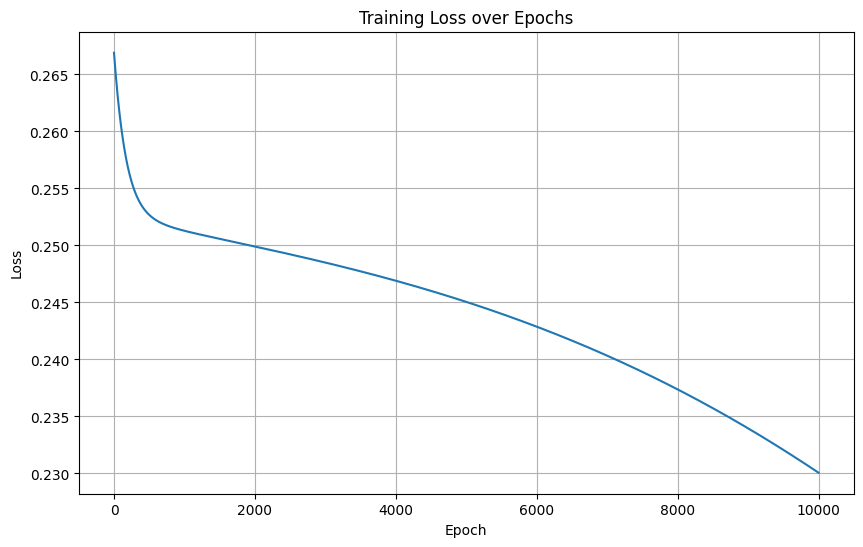

In [11]:
if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create a neural network with 2 input neurons, 1 hidden neurons, and 1 output neuron
    nn = NeuralNetwork([2, 1, 1], activation='sigmoid', learning_rate=0.01)

    loss_history = nn.train(X, y, epochs=10000, verbose=True, verbose_step=1000)
    predictions = nn.predict(X)

    print("\nPredictions:")
    for i in range(len(X)):
        print(f"Input: {X[i]}, Target: {y[i][0]}, Prediction: {predictions[i][0]:.4f}")

    # To visualize the loss
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()